In [1]:
import sys
sys.path.insert(0, '..')

import os
import requests

In [2]:
from biosimulator_processes.tests.test_copasi_process import test_process_from_document
from biosimulator_processes.tests.data_model import ProcessUnitTest
from biosimulator_processes import CORE
from process_bigraph import Composite, pp

CobraProcess registered successfully.
CopasiProcess registered successfully.
SmoldynProcess registered successfully.
TelluriumProcess registered successfully.


#### Step 1: Define the document to be read by the Composite, which is implemented by the Process

In [3]:
biomodel_id = 'BIOMD0000000630'

"""document = {
    'copasi': {
        '_type': 'process',
        'address': 'local:copasi',
        'config': {
            'model': {
                'model_source': biomodel_id  
            },
            'method': 'lsoda'
        },
        'inputs': {
            'floating_species': ['floating_species_store'],
            'model_parameters': ['model_parameters_store'],
            'time': ['time_store'],
            'reactions': ['reactions_store']
        },
        'outputs': {
            'floating_species': ['floating_species_store'],
            'time': ['time_store'],
        }
    },
    'emitter': {
        '_type': 'step',
        'address': 'local:ram-emitter',
        'config': {
            'emit': {
                'floating_species': 'tree[float]',
                'time': 'float',
            },
        },
        'inputs': {
            'floating_species': ['floating_species_store'],
            'time': ['time_store'],
        }
    }
}"""

document = {
    'copasi': {
        '_type': 'process',
        'address': 'local:copasi',
        'config': {
            'model': {
                'model_source': biomodel_id  
            },
            'method': 'lsoda'
        },
        'inputs': {
            'floating_species_concentrations': ['floating_species_concentrations_store'],
            'floating_species_counts': ['floating_species_counts_store'],
            'model_parameters': ['model_parameters_store'],
            'time': ['time_store'],
            'reactions': ['reactions_store']
        },
        'outputs': {
            'floating_species_concentrations': ['floating_species_concentrations_store'],
            'floating_species_counts': ['floating_species_counts_store'],
            'time': ['time_store'],
        }
    },
    'emitter': {
        '_type': 'step',
        'address': 'local:ram-emitter',
        'config': {
            'emit': {
                'floating_species_concentrations': 'tree[float]',
                'floating_species_counts': 'tree[float]',
                'time': 'float',
            },
        },
        'inputs': {
            'floating_species_concentrations': ['floating_species_concentrations_store'],
            'floating_species_counts': ['floating_species_counts_store'],
            'time': ['time_store'],
        }
    }
}

#### Step 2: Define the instance composition along with the process registry

In [4]:
workflow = Composite(
    config={'state': document},
    core=CORE
)

found a biomodel id


#### Step 3: Run the workflow for a duration and get the results

In [5]:
workflow.run(30)

results = workflow.gather_results()

/Users/alex/Desktop/uchc_work/repos/biosimulator-processes/notebooks/../biosimulator_processes/processes/copasi_process.py:245: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/alex/Desktop/uchc_work/repos/biosimulator-processes/notebooks/../biosimulator_processes/processes/copasi_process.py:255: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [6]:
pp(results)

{ ('emitter',): [ { 'floating_species_concentrations': { 'plasmin': 0.0,
                                                         'plasminogen': 0.0,
                                                         'single intact chain urokinase-type plasminogen activator': 0.0,
                                                         'two-chain urokinase-type plasminogen activator': 0.0,
                                                         'x': 0.0,
                                                         'x-plasmin': 0.0},
                    'floating_species_counts': { 'plasmin': 0.0,
                                                 'plasminogen': 0.0,
                                                 'single intact chain urokinase-type plasminogen activator': 0.0,
                                                 'two-chain urokinase-type plasminogen activator': 0.0,
                                                 'x': 0.0,
                                                 'x-plasmin': 

In [7]:
from biosimulator_processes.steps.viz import ResultsAnimation

In [8]:
output = results.copy()

In [9]:
output_vals = output[('emitter',)]

In [10]:
timescale = list(set([val.get('time', 0.0) for val in output_vals]))

In [11]:
timescale

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0]

In [12]:
data = []
counts_data = []

In [13]:
for i, val in enumerate(output_vals):
    species_data = val.get('floating_species_concentrations')
    data.append(species_data.get('plasminogen'))
    counts = val.get('floating_species_counts')
    counts_data.append(counts.get('plasminogen'))

In [14]:
data, counts_data

([0.0,
  0.00984133843876594,
  0.02921207965451493,
  0.06733400846024376,
  0.14233758795778217,
  0.28982541255797023,
  0.5795486179831706,
  1.147544194027111,
  2.2562471891542586,
  4.3579415230475,
  6.275671452239246,
  7.144014509638241,
  7.3089287889264805,
  7.315611011240136,
  7.316365684513063,
  7.316756829433092,
  7.3169610521427675,
  7.317067570211989,
  7.317123097692945,
  7.317152035718521,
  7.317167114522111,
  7.317174971056277,
  7.317179064381061,
  7.317181197005659,
  7.317182308089747,
  7.317182886953956,
  7.317183188536399,
  7.317183345657495,
  7.317183427515705,
  7.317183470162885,
  7.317183492381561],
 [0.0,
  5926592534504713.0,
  1.7591925557182108e+16,
  4.054948768826189e+16,
  8.571769901206453e+16,
  1.7453694302491686e+17,
  3.490123354758121e+17,
  6.910672664752013e+17,
  1.358743816244129e+18,
  2.6244137275640827e+18,
  3.7792976848898355e+18,
  4.302226096852387e+18,
  4.4015397971731594e+18,
  4.4055639255094036e+18,
  4.40601840037

In [15]:
len(timescale), len(data)

(31, 31)

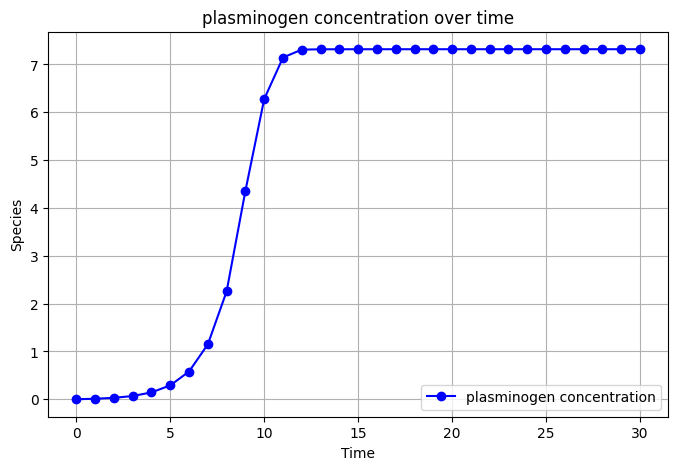

In [16]:
ResultsAnimation.plot_single_output(timescale=timescale, concentrations=data, species_name='plasminogen concentration')

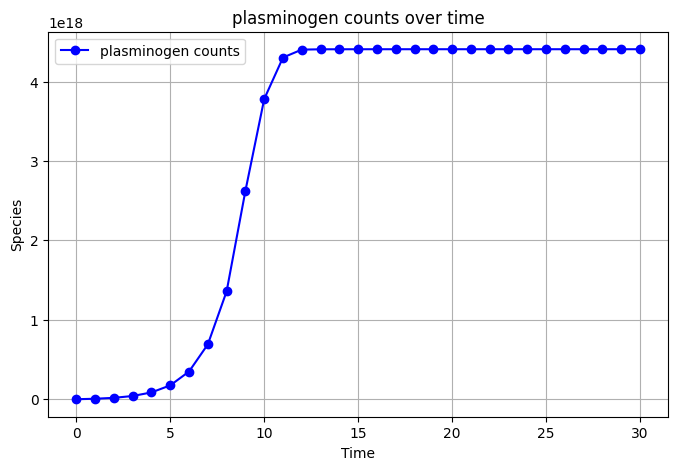

In [17]:
ResultsAnimation.plot_single_output(timescale=timescale, concentrations=counts_data, species_name='plasminogen counts')

In [18]:
from basico import * 
from biosimulator_processes.utils import fetch_biomodel


model = fetch_biomodel(biomodel_id)

In [19]:
get_species(model=model).particle_number

name
plasminogen                                                 6.022141e+15
plasmin                                                     0.000000e+00
single intact chain urokinase-type plasminogen activator    1.204428e+15
two-chain urokinase-type plasminogen activator              0.000000e+00
x                                                           0.000000e+00
x-plasmin                                                   0.000000e+00
Name: particle_number, dtype: float64

In [20]:
set_species('plasminogen', model=model, initial_concentration=5.032)

In [21]:
set_species('plasminogen', model=model, particle_number=5.032)

In [22]:
get_species(model=model).particle_number

name
plasminogen                                                 5.032000e+00
plasmin                                                     0.000000e+00
single intact chain urokinase-type plasminogen activator    1.204428e+15
two-chain urokinase-type plasminogen activator              0.000000e+00
x                                                           0.000000e+00
x-plasmin                                                   0.000000e+00
Name: particle_number, dtype: float64

In [23]:
get_species(model=model).initial_concentration

name
plasminogen                                                 5.032
plasmin                                                     0.000
single intact chain urokinase-type plasminogen activator    0.002
two-chain urokinase-type plasminogen activator              0.000
x                                                           0.000
x-plasmin                                                   0.000
Name: initial_concentration, dtype: float64